In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('indonesia_population.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
X

array([[1.070000e+00, 2.898047e+06],
       [1.100000e+00, 2.955025e+06],
       [1.140000e+00, 3.019580e+06],
       [1.180000e+00, 3.094582e+06],
       [1.230000e+00, 3.173125e+06],
       [1.330000e+00, 3.309808e+06],
       [1.340000e+00, 3.108949e+06],
       [1.360000e+00, 2.955129e+06],
       [1.440000e+00, 2.915913e+06],
       [1.660000e+00, 3.104172e+06],
       [1.920000e+00, 3.286190e+06],
       [2.270000e+00, 3.506923e+06],
       [2.440000e+00, 3.353422e+06],
       [2.630000e+00, 3.177510e+06],
       [2.740000e+00, 2.905223e+06],
       [2.700000e+00, 2.503199e+06],
       [2.580000e+00, 2.095529e+06],
       [2.130000e+00, 1.546022e+06]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
X_train

array([[1.230000e+00, 3.173125e+06],
       [1.140000e+00, 3.019580e+06],
       [2.580000e+00, 2.095529e+06],
       [2.130000e+00, 1.546022e+06],
       [1.660000e+00, 3.104172e+06],
       [1.360000e+00, 2.955129e+06],
       [2.630000e+00, 3.177510e+06],
       [2.270000e+00, 3.506923e+06],
       [1.180000e+00, 3.094582e+06],
       [1.070000e+00, 2.898047e+06],
       [1.330000e+00, 3.309808e+06],
       [2.700000e+00, 2.503199e+06],
       [2.440000e+00, 3.353422e+06]])

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train

array([[-0.96354832,  0.51160442],
       [-1.1093894 ,  0.22095876],
       [ 1.22406786, -1.52817937],
       [ 0.49486246, -2.56834236],
       [-0.26675206,  0.38108314],
       [-0.75288899,  0.09895932],
       [ 1.30509068,  0.5199048 ],
       [ 0.72172636,  1.14345138],
       [-1.04457115,  0.36293021],
       [-1.22282135, -0.00909132],
       [-0.80150268,  0.77033197],
       [ 1.41852263, -0.75649995],
       [ 0.99720396,  0.852889  ]])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(y_pred)
print(y_test)

[4 4 4 4 4]
[4 4 4 4 5]


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4 0]
 [1 0]]


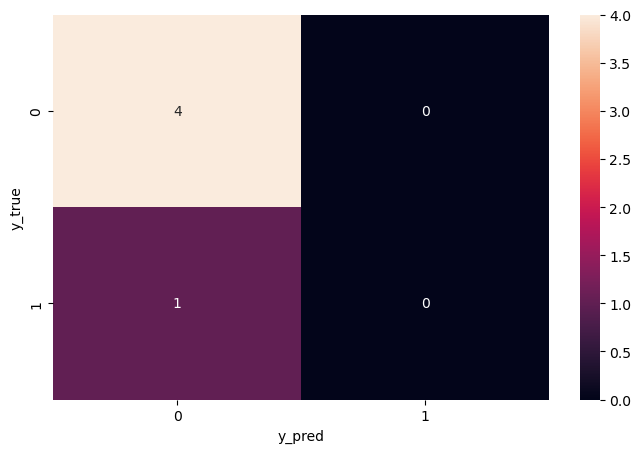

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [13]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



c:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\asus\AppData\Local\Temp\ipykernel_26344\3527347499.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


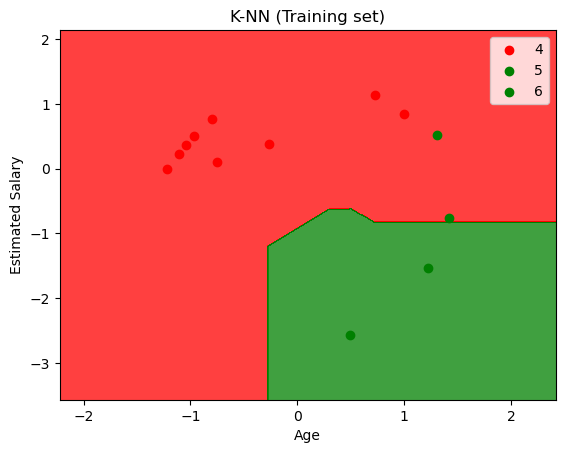

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_26344\1102702729.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


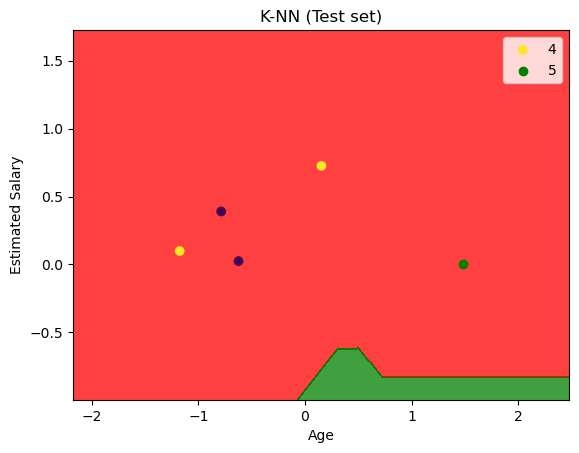

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()